In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prediction(X: np.array, theta: np.array) -> np.array:
    """Return pred of multiple linear regression
    (result of hypothesis function)    
    
    Number of explanatory variable : n
    Number of data : m
    
    X     : m * n matrix
    theta : vector with n elements (~= n * 1 matrix)
    """
    
    return X @ theta

In [3]:
def gradient_descent(
    X : np.array,
    theta : np.array,
    y : np.array,
    iterations : int,
    alpha : float
    ) -> np.array:
    
    """Return updated theta with gradient descent"""
    
    costs = []
    m = len(X)
    for _ in range(iterations):
        error = prediction(X, theta) - y
        costs.append((error @ error) / (2 * m))
        theta -= (alpha / m) * (X.T @ error)            
    
    return theta, costs
    

[22.  21.8 21.2 26.7 24.7 24.8 25.5 26.2 29.7 31.4 33.1 33.9 39.  39.4
 39.5 40. ]
[ 0.18411079  0.45863266 -0.06568251  2.05404881]


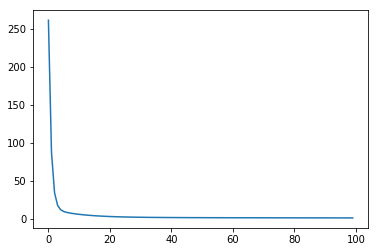

In [4]:
if __name__ == '__main__':
    
    ## input variables
    house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
    distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
    number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수
    
    ## design matrix : X
    X = np.array([
        np.ones(house_size.shape[0]),
        house_size,
        distance_from_station,
        number_of_rooms
    ]).T
    
    ## parameter theta
    theta = np.array([1, 2, 3, 4], dtype='float64')
    
    print(prediction(X, theta))

    ## target variable
    house_price = np.array([3, 3.2, 3.6 , 8, 3.4, 4.5, 5, 5.8, 6, 6.5, 9, 9, 10, 12, 13, 15])  # 집 가격

    ## gradient descent with alpha 0.01 and 100 iterations
    y = house_price
    theta, costs = gradient_descent(X, theta, y, 100, 0.01)
    print(theta)
    
    ## visualing loss function
    plt.plot(costs)

In [5]:
## multiple linear regression with sklearn package

## prepare data
from sklearn.datasets import load_boston

In [6]:
boston_dataset = load_boston()

In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
import pandas as pd

X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
y = pd.DataFrame(boston_dataset.target, columns=['MEDV'])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
## prepare training set, test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [13]:
## linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model.coef_  ## theta

array([[-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,
         2.70536624e+00, -1.59570504e+01,  3.41397332e+00,
         1.11887670e-03, -1.49308124e+00,  3.64422378e-01,
        -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
        -5.94076089e-01]])

In [15]:
model.intercept_  ## theta_0

array([37.91248701])

In [16]:
y_test_prediction = model.predict(X_test)

In [17]:
mean_squared_error(y_test, y_test_prediction) ** 0.5

4.5682920423032

In [18]:
## another dataset

from sklearn import datasets

diabetes_dataset = datasets.load_diabetes()

In [19]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [20]:
diabetes_dataset.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [21]:
X = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
y = pd.DataFrame(diabetes_dataset.target, columns=['diabetes'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LinearRegression()
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)

mse ** 0.5

54.603896119844435